# Speech Emotion Recognition Model CNN/LSTM - Part 1 

## Overview of the Notebook

Here are some key points you can include in the overview of the notebook:

1. **Objective**: 
    - Build a Speech Emotion Recognition (SER) model using a combination of Convolutional Neural Networks (CNN) and Long Short-Term Memory (LSTM) networks to classify emotions based on audio features.


2. **Dataset Introduction**:
   - Use multiple audio emotion datasets: RAVDESS, CREMA-D, TESS, and SAVEE.
   - Perform data preprocessing and cleaning steps for each dataset, labeling emotions as 'neutral,' 'happy,' 'sad,' 'angry,' 'fear,' 'disgust,' or 'surprise.'


3. **Libraries and Dependencies**:
   - Import essential libraries like `librosa` for audio processing, `matplotlib` and `seaborn` for visualization, and `sklearn` for data manipulation.


4. **Data Preprocessing**:
   - Load, organize, and merge data from each dataset.
   - Extract file paths and assign correct labels to each audio file based on its filename.
   - Analyze data distribution to ensure balanced classes.


5. **Feature Engineering**:
   - Perform audio feature extraction using techniques such as Mel Spectrograms, MFCCs (Mel-Frequency Cepstral Coefficients), Zero Crossing Rate, and Root Mean Square Energy (RMSE).
   - Implement data augmentation techniques (adding noise, time stretching, shifting, and pitch adjustment) to increase data diversity.


6. **Feature Extraction Function**:
   - Define functions to streamline feature extraction and data augmentation for each audio sample.
   - Ensure efficient handling of audio files to extract meaningful features for model training.


7. **Parallel Processing**:
   - Utilize multiprocessing to speed up feature extraction across a large dataset.


8. **Model Preparation**:
   - Structure the extracted features and corresponding emotion labels into a DataFrame, and save the processed data for further modeling.


9. **Data Storage**:
   - Save extracted features to a CSV file for future use and to simplify the model training process.

# Libraries Import

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. 
# It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Data Import

In [2]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [3]:
# Ravdess Datset

ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + i + '/' + f)
        
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-06-02-01-01-07.wav
03
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav
5
03-01-05-02-01-02-07.wav


In [4]:
# dataframe for emotion of All dataset files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [5]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(Ravdess_df.head())
print("______________________________________________")
print(Ravdess_df.tail())
print("_______________________________________________")
print(Ravdess_df.Emotions.value_counts())

   Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
______________________________________________
     Emotions                                               Path
1435     fear  /kaggle/input/ravdess-emotional-speech-audio/a...
1436    angry  /kaggle/input/ravdess-emotional-speech-audio/a...
1437      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1438  disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
1439    angry  /kaggle/input/ravdess-emotional-speech-audio/a...
_______________________________________________
Emotions
neutral     288
surprise    192
disgust     192
fear        192
sad         192
happy       192
angry       192
Name: count, dty

In [6]:
# Crema Dataset

crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
disgust    1271
happy      1271
sad        1271
fear       1271
angry      1271
neutral    1087
Name: count, dtype: int64


In [7]:
# Tess Dataset

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64


In [8]:
# SAVEE Dataset

savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
neutral     120
happy        60
fear         60
disgust      60
angry        60
surprise     60
sad          60
Name: count, dtype: int64


In [9]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [10]:
len(data_path)

12162

In [11]:
print(data_path.Emotions.value_counts())

Emotions
disgust     1923
fear        1923
sad         1923
happy       1923
angry       1923
neutral     1895
surprise     652
Name: count, dtype: int64


In [12]:
data,sr = librosa.load(file_path[0])
sr

22050

In [13]:
ipd.Audio(data,rate=sr)

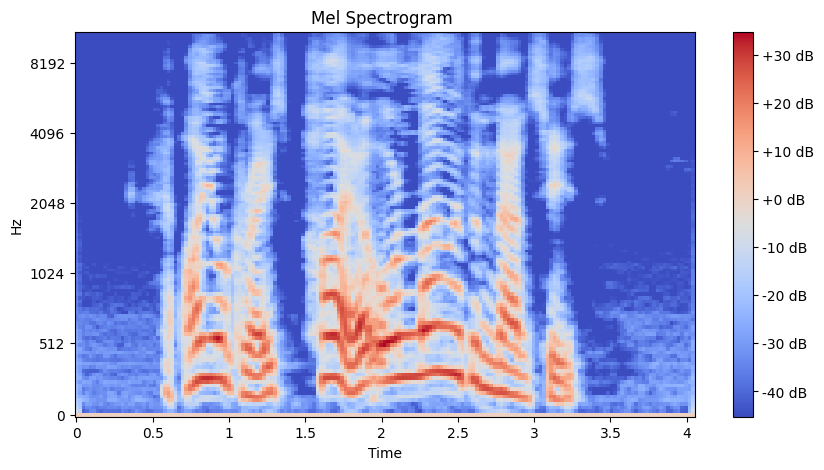

In [14]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB');

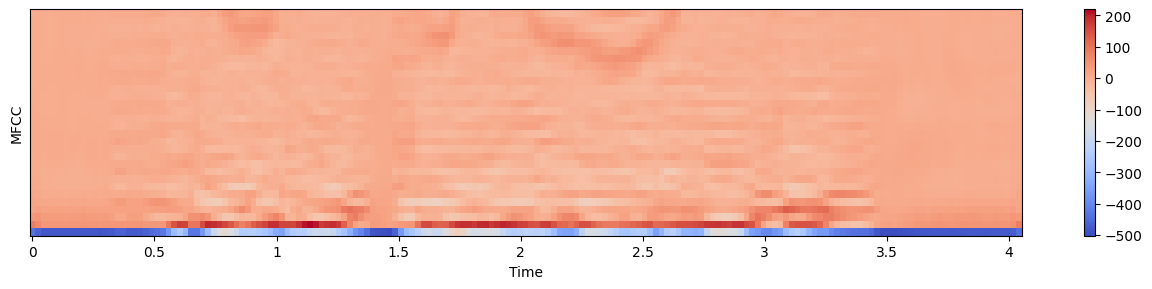

In [15]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [16]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

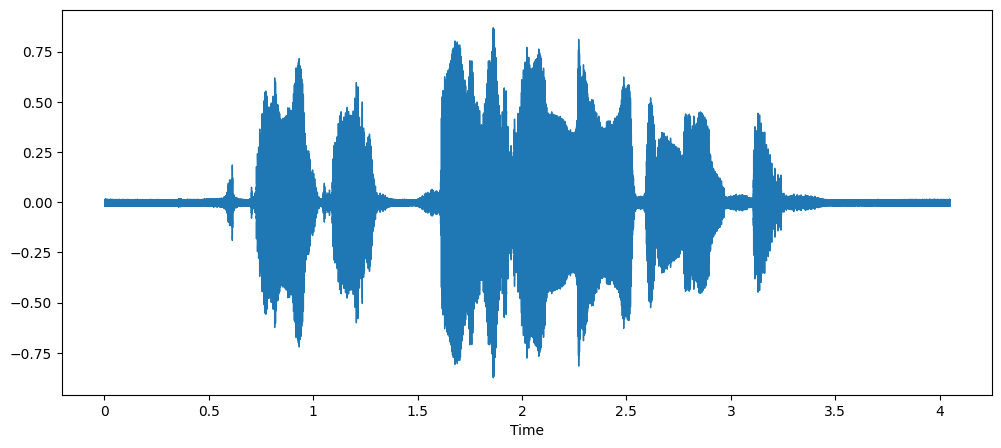

In [17]:
# NORMAL AUDIO

import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

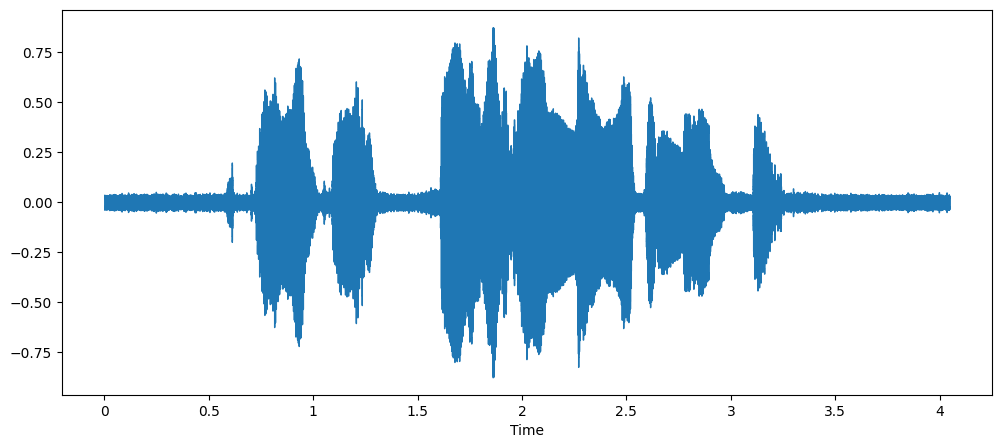

In [18]:
# AUDIO WITH NOISE

x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

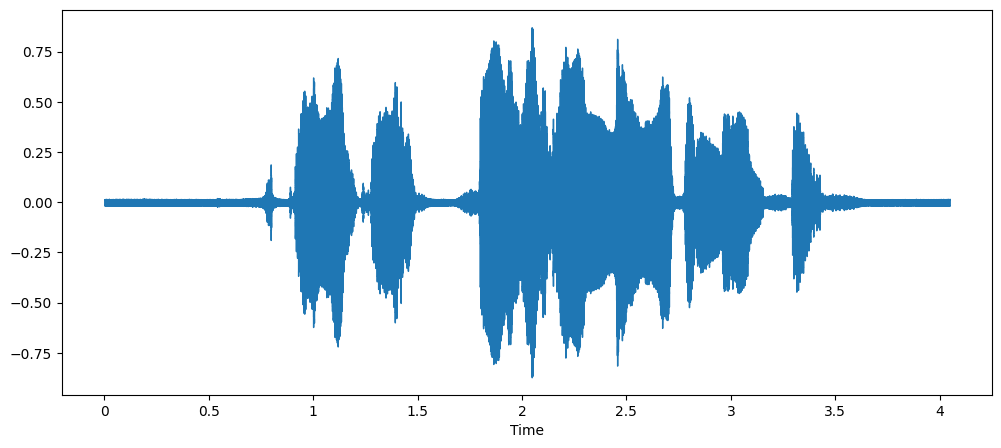

In [19]:
# SHIFTED AUDIO

x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# Feature extraction

In [20]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_result = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_result.T) if not flatten else np.ravel(mfcc_result.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
         zcr(data,frame_length,hop_length),
         rmse(data,frame_length,hop_length),
         mfcc(data,sr,frame_length,hop_length)
        ))
    
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

In [21]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


# Get Features

In [22]:
import timeit
from tqdm import tqdm

start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)  

1it [00:01,  1.16s/it]

0 audio has been processed


501it [01:51,  4.59it/s]

500 audio has been processed


1001it [03:42,  4.58it/s]

1000 audio has been processed


1502it [05:31,  5.92it/s]

1500 audio has been processed


2002it [06:58,  6.62it/s]

2000 audio has been processed


2502it [08:27,  5.89it/s]

2500 audio has been processed


3002it [09:56,  5.78it/s]

3000 audio has been processed


3502it [11:25,  6.04it/s]

3500 audio has been processed


4002it [12:56,  6.02it/s]

4000 audio has been processed


4501it [14:25,  4.74it/s]

4500 audio has been processed


5002it [15:55,  6.09it/s]

5000 audio has been processed


5502it [17:25,  5.94it/s]

5500 audio has been processed


6001it [18:55,  5.22it/s]

6000 audio has been processed


6501it [20:25,  5.35it/s]

6500 audio has been processed


7002it [21:56,  5.76it/s]

7000 audio has been processed


7502it [23:27,  5.73it/s]

7500 audio has been processed


8001it [24:58,  5.88it/s]

8000 audio has been processed


8502it [26:30,  5.27it/s]

8500 audio has been processed


9002it [27:56,  8.01it/s]

9000 audio has been processed


9502it [28:59,  6.38it/s]

9500 audio has been processed


10002it [30:20,  6.65it/s]

10000 audio has been processed


10502it [31:50,  6.77it/s]

10500 audio has been processed


11002it [33:05,  7.01it/s]

11000 audio has been processed


11502it [34:24,  7.41it/s]

11500 audio has been processed


12001it [35:59,  4.74it/s]

12000 audio has been processed


12162it [36:34,  5.54it/s]

Done
Time:  2194.52383236


In [23]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

# Saving features

In [24]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517691,-1.716481,-1.599312,-1.234615,-0.693200,-0.038981,0.675205,1.405603,2.112302,surprise
1,0.249512,0.371094,0.494629,0.487305,0.450195,0.416992,0.373047,0.337402,0.333496,0.333008,...,1.221636,1.231226,4.829375,-2.660280,-2.523232,0.690448,-3.171180,-4.200538,0.267294,surprise
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.518293,0.838663,1.308726,1.855110,2.405185,2.896439,3.283485,3.541677,3.667470,surprise
3,0.257324,0.390625,0.510254,0.520020,0.499512,0.505859,0.493652,0.469238,0.480957,0.458496,...,-2.230192,0.787118,-3.272193,-2.678341,-4.033977,0.941363,3.609636,5.748407,5.765827,surprise
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586420,2.746858,2.223281,0.986924,-0.730691,-2.530884,-4.002835,-4.849377,-4.929749,neutral


# Next Steps - Model Creation

This notebook [Speech Emotion Recognition Model CNN/LSTM | Part 2](https://www.kaggle.com/code/rikinzala/speech-emotion-recognition-model-cnn-lstm-part-2) will focus solely on the model training and evaluation steps, building upon the preprocessed and augmented data saved from this initial notebook.